In [70]:
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as score 
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [71]:
cancer=ds.load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [72]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [73]:
data=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
data['target']=cancer['target']
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [75]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


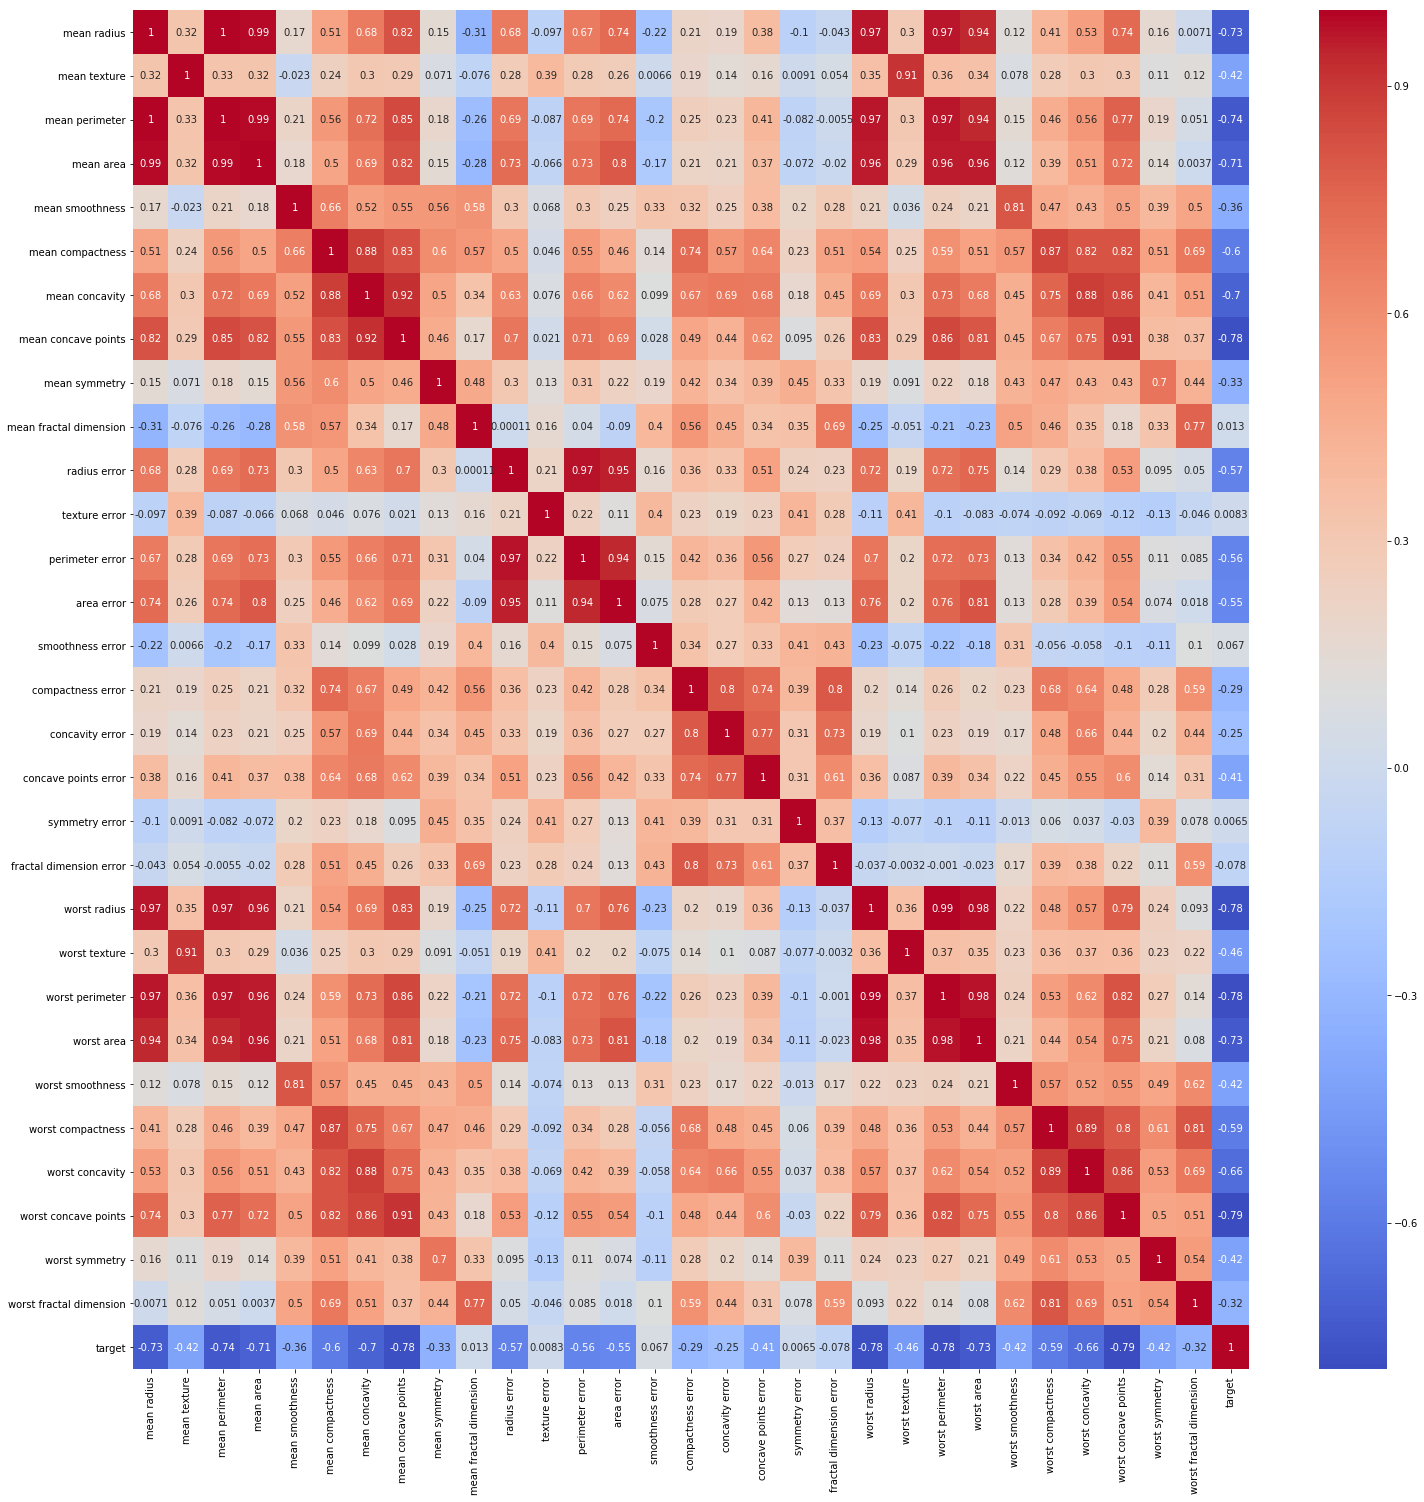

In [76]:
corr=data.corr()
plt.rcParams["figure.figsize"] = (25,25)
sns.heatmap(corr, cmap = "coolwarm", annot = True)

In [77]:
data=data.drop(['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst perimeter', 'worst area'],axis=1)

In [78]:
data.head(5)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [79]:
Y=data['target']
data=data.drop(['target'],axis=1)
data.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
data = (data - data.min())/(data.max() - data.min())
data.head(5)


,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,...,0.311645,0.183042,0.620776,0.141525,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,...,0.084539,0.091110,0.606901,0.303571,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,...,0.205690,0.127006,0.556386,0.360075,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,...,0.728148,0.287205,0.248310,0.385928,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,...,0.136179,0.145800,0.519744,0.123934,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [81]:
X=data
n=100
X.shape,Y.shape


((569, 24), (569,))

In [83]:
accuracy_score=0
for i in range(n):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
    model=LogisticRegression().fit(X_train,Y_train)
    Y_predtest = model.predict(X_test)
    print(Y_predtest)
    test_score=score(Y_test,Y_predtest)
    
    
print(test_score)

[1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1
 0 1 1]
[1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 1 1]
[0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 1 

[0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0
 0 1 1]
[1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0]
[1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0
 1 1 1 0 

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 0]
[0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 1]
[0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 

[1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 0 1 1]
0.9521276595744681
